#  Feature Extraction from Audio

## Load the audio file

In [1]:
import librosa
audio_path = 'speechdataset/on/00b01445_nohash_0.wav'
x , sr = librosa.load(audio_path)

## Playing the audio file

In [2]:
import IPython.display as ipd
ipd.Audio(audio_path)

## Visualizing Audio

### Waveform
We can plot the audio array using librosa.display.waveplot:

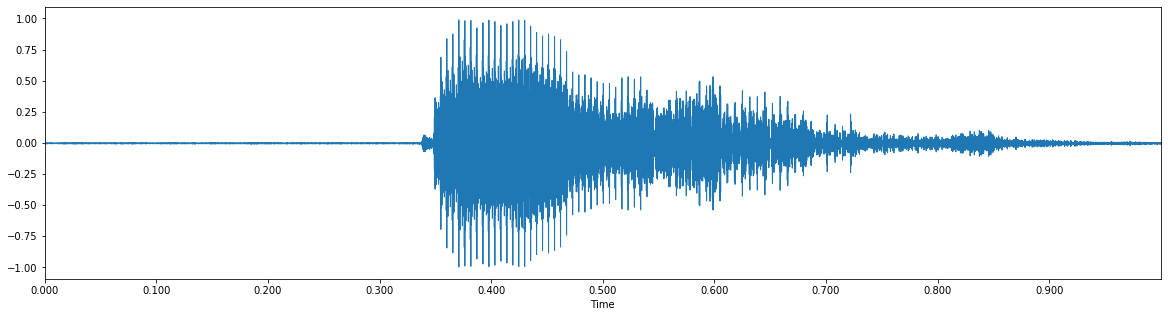

In [3]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

Here, we have the plot the amplitude envelope of a waveform.

# Spectrogram
We can also display a spectrogram using librosa.display.specshow.

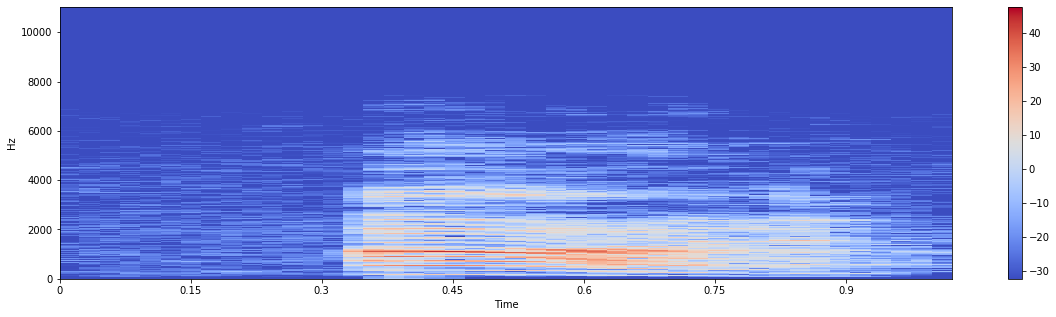

In [4]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Log Frequency axis

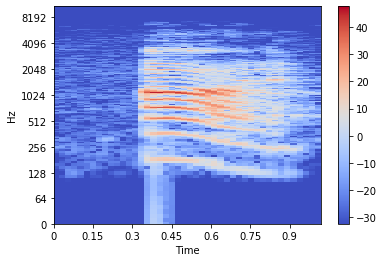

In [5]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Zero Crossing Rate

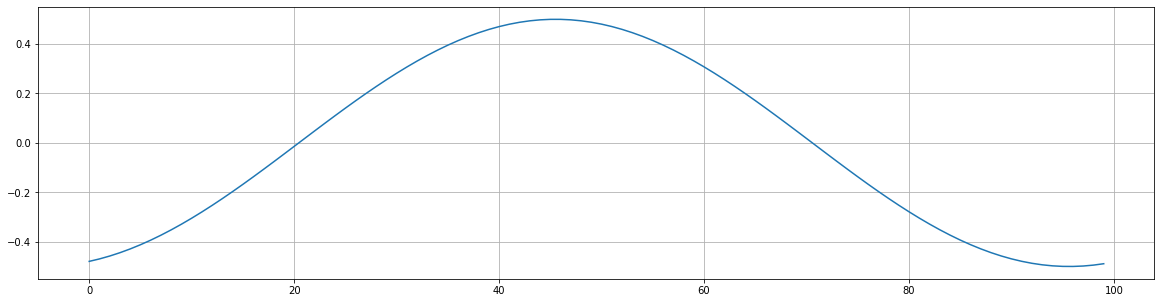

In [9]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [10]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape


(100,)

In [11]:
print(sum(zero_crossings))

2


## Energy

The energy of a signal is the total magnitude of the signal, i.e. how loud the signal is. It is defined as:

\[E(x) = \sum_n {\mid x(n) \mid}^2\]

In [13]:
def rmse(x):
    return np.sum(x**2)


rmse(x)

13781.25

In [ ]:
#rmse = librosa.feature.rmse(y)[0]

## Tempo

Tempo means the speed at which a piece of music should be played. 

In [16]:
tempo = librosa.beat.tempo(x)[0]

In [17]:
tempo

112.34714673913044

## 2.Spectral Centroid


In [12]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(216,)